In [3]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [4]:
os.chdir('E:\Data\Movie_Recom')

In [9]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
movie = pd.read_csv('movie.data', sep = '\t', names = col_names)

In [10]:
movie.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_title = pd.read_csv('movie_id.txt')

In [8]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df = pd.merge(movie, movie_title, on = 'item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### EDA on df

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

Even though some movies have rating of 5 we are not sure how many people have rated them so we calculate number of times the movie had been rated 

In [26]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

For movie recommendation we need the rating of that movie and number of times the movie has been rated

In [29]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [30]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [31]:
ratings['number_of_times_rated'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [33]:
ratings.head()

,rating,number_of_times_rated
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


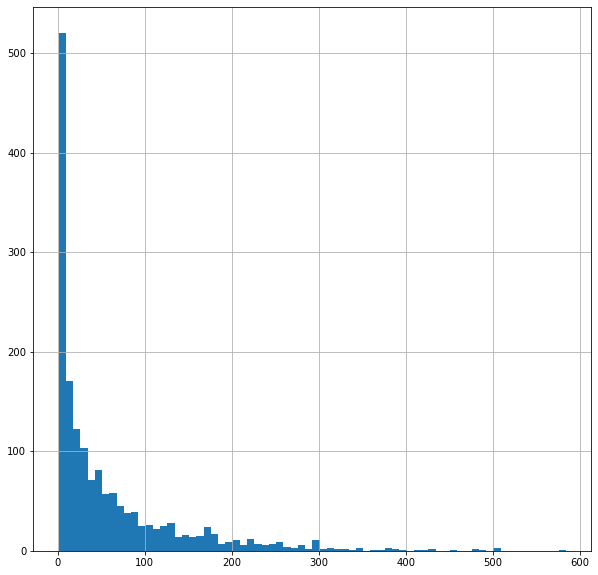

In [35]:
plt.figure(figsize = (10, 10))
ratings['number_of_times_rated'].hist(bins = 70)
plt.show()

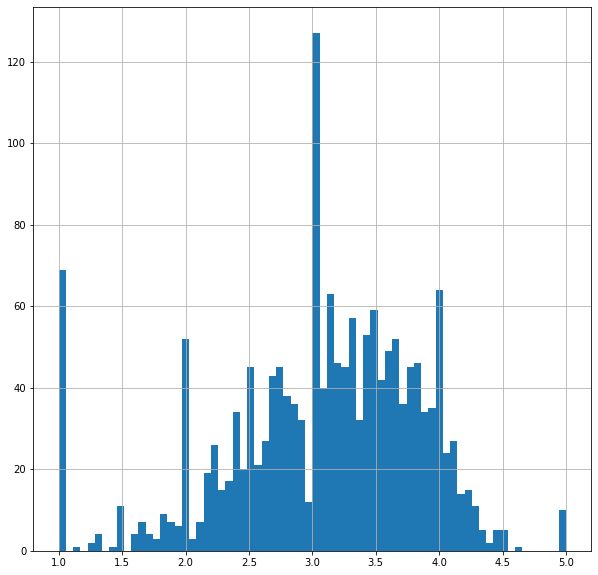

In [36]:
plt.figure(figsize = (10, 10))
ratings['rating'].hist(bins = 70)
plt.show()

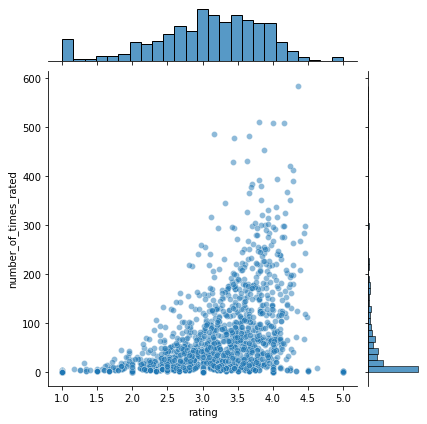

In [37]:
sns.jointplot(x = 'rating', y = 'number_of_times_rated', data = ratings, alpha = 0.5)

A movie recommendation system works on the basis of rating provided by a particular user to different movies. So, we make our dataset according to our need.

In [38]:
movies_recom = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [40]:
movies_recom.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                             NaN               NaN   
3                 NaN                             NaN               NaN   
4                 NaN                             NaN               NaN   

title    A Chef in Love (1996)  Above the Rim (1994)  Absolute Power (1997)  \
user_id                                                                       
0                          NaN                   NaN                    NaN   
1                          NaN                   NaN                    NaN   
2                          NaN                   NaN                    3.0   
3                          NaN                   NaN                    NaN   
4                          NaN                   NaN                    NaN   

title    Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
user_id                                                         
0                      NaN                                NaN   
1                      3.0                                3.0   
2                      NaN                                NaN   
3                      NaN                                NaN   
4                      NaN                                NaN   

title    Ace Ventura: When Nature Calls (1995)  Across the Sea of Time (1995)  \
user_id                                                                         
0                                          NaN                            NaN   
1                                          NaN                            NaN   
2       

In [44]:
ratings.sort_values('number_of_times_rated', ascending = False).head(10)

,rating,number_of_times_rated
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's take a movie on the basis of which we recommend movie to the user.

In [45]:
user_rating_starwars = movies_recom['Star Wars (1977)']

In [46]:
user_rating_starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

Now we will use the corrwith() to find the relationship between two pandas series

In [47]:
movie_similar_to_starwars = movies_recom.corrwith(user_rating_starwars)

C:\Users\chhav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\chhav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [48]:
movie_similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [49]:
sim_to_starwars = pd.DataFrame(movie_similar_to_starwars, columns = ['Correlation'])

In [54]:
sim_to_starwars.dropna(inplace = True)
sim_to_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
sim_to_starwars.sort_values('Correlation', ascending = False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


Some movies are perfectly correlated which is hard to believe. So, let's filter out movies having less than 100 reviews. The value 100 has been chosen from the graph of number_of_times_rated.

In [57]:
sim_to_starwars = sim_to_starwars.join(ratings['number_of_times_rated'])

In [63]:
sim_to_starwars[sim_to_starwars['number_of_times_rated']>100].sort_values('Correlation', ascending = False).head()

,Correlation,number_of_times_rated
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Similarly we can recommend movie on the basis of movie watched 